In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import psycopg2 as psy
import os 
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import *
import sys
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor

%matplotlib inline

os.getcwd()

'/Users/HudsonCavanagh/GA_dsi-projects/capstone'

In [2]:
unemp_03_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/unemp_tot_03_14.csv')
unemp_03_14 = unemp_03_14.iloc[:,1:]

pov_county_year_03_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pov_county_year_03_14.csv')
pov_county_year_03_14 = pov_county_year_03_14.iloc[:,1:]

cdc_03_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/cdc_03_14.csv')
cdc_03_14 = cdc_03_14.iloc[:,2:]
cdc_03_14.head(12)

,County,County Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Hispanic Origin,Hispanic Origin Code,...,year,pct_total_deaths,deaths,population,crude_100k,county_id,state,county_code,CTYNAME,pop_merge_ind
0,"Jefferson County, AL",1073.0,15-24 years,15-24,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.027,11.0,19306.0,56.977106,1073,AL,1073,Jefferson County,Jefferson County_2014
1,"Jefferson County, AL",1073.0,25-34 years,25-34,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.039,16.0,23590.0,67.825350,1073,AL,1073,Jefferson County,Jefferson County_2014
2,"Jefferson County, AL",1073.0,25-34 years,25-34,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.065,27.0,22917.0,117.816468,1073,AL,1073,Jefferson County,Jefferson County_2014
3,"Jefferson County, AL",1073.0,35-44 years,35-44,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.053,22.0,20774.0,105.901608,1073,AL,1073,Jefferson County,Jefferson County_2014
4,"Jefferson County, AL",1073.0,35-44 years,35-44,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.063,26.0,21104.0,123.199393,1073,AL,1073,Jefferson County,Jefferson County_2014
5,"Jefferson County, AL",1073.0,45-54 years,45-54,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.046,19.0,23482.0,80.913040,1073,AL,1073,Jefferson County,Jefferson County_2014
6,"Jefferson County, AL",1073.0,45-54 years,45-54,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.078,32.0,22839.0,140.111213,1073,AL,1073,Jefferson County,Jefferson County_2014
7,"Jefferson County, AL",1073.0,55-64 years,55-64,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.029,12.0,25098.0,47.812575,1073,AL,1073,Jefferson County,Jefferson County_2014
8,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,Black or African American,2054-5,Not Hispanic or Latino,2186-2,...,2014,0.024,10.0,15872.0,63.004032,1073,AL,1073,Jefferson County,Jefferson County_2014
9,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,...,2014,0.080,33.0,23237.0,142.014890,1073,AL,1073,Jefferson County,Jefferson County_2014


In [3]:
#adding up Jefferson County to see if its what I expect it to be
# 19306.0 + 23590.0 + 22917.0 + 20774.0 + 21104.0 + 23482.0 + 22839.0 + 25098.0 + 15872.0 + 23237.0

In [4]:
unemp_03_14.head()

,year,county_code,nan,working_pop,employed_pop,unemployed_pop,unemp_perc
0,2003,1001,NaN,22604.0,21462.0,1142.0,5.1
1,2003,1003,NaN,72299.0,68702.0,3597.0,5.0
2,2003,1005,NaN,10977.0,10196.0,781.0,7.1
3,2003,1007,NaN,8836.0,8309.0,527.0,6.0
4,2003,1009,NaN,25900.0,24702.0,1198.0,4.6


In [5]:
pop_03 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_03_output.csv')
pop_04 =pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_04_output.csv')
pop_05 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_05_output.csv')
pop_06 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_06_output.csv')
pop_07 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_07_output.csv')
pop_08 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_08_output.csv')
pop_09 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_09_output.csv')
pop_10_14 = pd.read_csv('/Users/HudsonCavanagh/Documents/csv_out_duplicate/pop_10_15_output.csv')


pop_10_14 = pop_10_14.loc[:,['year', 'county_code', 'pop_sub_15', 'pop_15-34', 'pop_35-54', 'pop_55+','pop_black','pop_white','pop_hisp','pop_asian', 'pop_male', 'population', 'TOT_POP']]
# pop_10_14.describe() 

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pop_10_14.head() # checked code 01005, Barbour county, listed is 2x actual
# pop_03.head()

,year,county_code,pop_sub_15,pop_15-34,pop_35-54,pop_55+,pop_black,pop_white,pop_hisp,pop_asian,pop_male,population,TOT_POP
0,2010,1001,11824,13864,16471,12501,20286,86614,2616,990,NaN,NaN,109320
1,2010,1003,34792,42297,50530,55574,36630,320982,16174,2754,NaN,NaN,366386
2,2010,1005,4909,7316,7586,7530,26074,27820,2716,240,NaN,NaN,54682
3,2010,1007,4192,6245,6751,5673,10256,35036,824,38,NaN,NaN,45722
4,2010,1009,11557,14033,15963,15820,2030,110792,9338,262,NaN,NaN,114746


In [7]:


pop_03_14 = pd.concat([pop_03, pop_04, pop_05, pop_06, pop_07, pop_08, pop_09, pop_10_14], axis=0) #this works 1) need to make floats 2) need more data
# pop_03_14.head(25) #25136 with axis =1
# pop_03_14 = pop_03_14.loc[:,['year', 'county_code', 'pop_sub_15', 'pop_15-34', 'pop_35-54', 'pop_55+','pop_black','pop_white','pop_hisp','pop_asian', 'pop_male', 'population', 'TOT_POP']]
pop_03_14.head()


,AGEGRP,ORIGIN,RACE,SEX,TOT_POP,Unnamed: 0,age_group,county_code,hisp,pop_15-34,...,pop_hisp,pop_male,pop_sub_15,pop_white,population,population_age_sex,population_race_hisp,race,sex,year
0,32319.0,3591.0,10773.0,3591.0,NaN,0.0,32319.0,1001,3591.0,1501038.0,...,10489824.0,2867760.0,1372644.0,8599248.0,NaN,11793600.0,21340800.0,10773.0,3591.0,2003
1,32319.0,3591.0,10773.0,3591.0,NaN,1.0,32319.0,1003,3591.0,4468590.0,...,33712080.0,9349452.0,3701502.0,30329928.0,NaN,38180268.0,69088104.0,10773.0,3591.0,2003
2,32319.0,3591.0,10773.0,3591.0,NaN,2.0,32319.0,1005,3591.0,1006992.0,...,6342048.0,1892646.0,707742.0,3356160.0,NaN,7205688.0,13038864.0,10773.0,3591.0,2003
3,32319.0,3591.0,10773.0,3591.0,NaN,3.0,32319.0,1007,3591.0,749700.0,...,4811940.0,1394190.0,558306.0,3765876.0,NaN,5392548.0,9757944.0,10773.0,3591.0,2003
4,32319.0,3591.0,10773.0,3591.0,NaN,4.0,32319.0,1009,3591.0,1739682.0,...,11465664.0,3352608.0,1423044.0,11804244.0,NaN,13471164.0,24376392.0,10773.0,3591.0,2003


In [8]:
def pop_year_clean(year):
    year = str(year)
    year = year.replace(" ", "")
    try:
        year = int(year)
    except:
        year = year
    return year

pop_03_14['year'] = pop_03_14['year'].apply(lambda x: pop_year_clean(x)) #noticed 2013 was split into 2 groups
pop_03_14['year'].value_counts()
# len(pop_03_14)
# pop_03_15.isnull().sum()

2009                 3143
2008                 3143
2007                 3143
2006                 3143
2005                 3143
2004                 3143
2003                 3143
2010_census          3142
2010_pop_est_base    3142
2015                 3142
2014                 3142
2013                 3142
2012                 3142
2011                 3142
2010                 3142
Name: year, dtype: int64

In [9]:
pov_county_year_03_14['year'].value_counts()

2013    3195
2014    3194
2012    3194
2011    3194
2010    3194
2009    3193
2008    3192
2006    3192
2005    3192
2007    3191
2004    3191
2003    3191
Name: year, dtype: int64

### Issue with Population information

None of the population figures are around the order of magnitude I expected, which I believe owes to the previous groupby being summed, rather than averaged (which would have made more sense at the county level). Nonetheless, each column is consistent, so instead of proportional demographics, going to use ratio of demographics

-May be that in the calculations, should have been multiplying by 'POP_TOT'>
pop_03_14['pop_white'][pop_03_14['year']==2009].sum()  equals 54 billion ....


In [10]:
### Making ratios of existing columns

pop_03_14['pop_total_age'] = pop_03_14['pop_sub_15'] + pop_03_14['pop_15-34'] + pop_03_14['pop_35-54'] + pop_03_14['pop_55+']
pop_03_14['pop_sub_15_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_15-34_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_35-54_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_55+_prop'] = pop_03_14['pop_sub_15']/pop_03_14['pop_total_age']
pop_03_14['pop_big_3_races'] = pop_03_14['pop_black'] + pop_03_14['pop_white'] + pop_03_14['pop_asian']
pop_03_14['pop_asian_prop'] = pop_03_14['pop_asian']/pop_03_14['pop_big_3_races']
pop_03_14['pop_white_prop'] = pop_03_14['pop_white']/pop_03_14['pop_big_3_races']
pop_03_14['pop_black_prop'] = pop_03_14['pop_black']/pop_03_14['pop_big_3_races']
pop_03_14['pop_hisp_prop'] = pop_03_14['pop_hisp']/pop_03_14['pop_big_3_races']
pop_03_14['pop_male_prop'] = pop_03_14['pop_male'] / pop_03_14['pop_total_age']


In [11]:
# a_codes = set(cdc_03_14['county_code'])
# b_codes = set(pop_03_14['county_code'])

# a_in_b = []
# for a in a_codes:
#     if a in b_codes:
#         a_in_b.append(a)
        
# b_in_a = []
# for b in b_codes:
#     if b in a_codes:
#         b_in_a.append(b)

# print(len(a_in_b), len(b_in_a))


####################### Matches - same county_codes

In [12]:
#grouping cdc data

deaths_pop = cdc_03_14.groupby(by=['year', 'county_code']).sum()

#calculating target

deaths_pop['death_per_head'] = deaths_pop['deaths'] / deaths_pop['population']
deaths_pop.reset_index(inplace=1)

#merging population
deaths_pop = pd.merge(deaths_pop, pop_03_14, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])
deaths_pop['population'] = deaths_pop['population_x']

#merging poverty

deaths_pop = pd.merge(deaths_pop, pov_county_year_03_14, how='left', left_on=['year','county_code'], right_on=['year','county_code'])


#merging unemployment

deaths_pop = pd.merge(deaths_pop, unemp_03_14, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])

In [13]:
# # #calculations that required merge

deaths_pop['perc_pop_employed'] = deaths_pop['employed_pop']/deaths_pop['population']
deaths_pop['unemp_rate'] = 1 - (deaths_pop['employed_pop']/deaths_pop['working_pop']) #this is good
deaths_pop['perc_pop_working'] = deaths_pop['working_pop']/deaths_pop['population']
deaths_pop['pov_rate'] = deaths_pop['pov_count_tot']/ deaths_pop['population']
deaths_pop['pov_rate_youth'] = deaths_pop['pov_youth_count_0-17']/ deaths_pop['population']
deaths_pop['constant'] = 1.0

deaths_pop.drop(1391, inplace=1)#noticed this is an outliar in plot below Coconino, AZ  pop listed as 1196.0

deaths_pop[deaths_pop['county_code']==4005] 

,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,working_pop,employed_pop,unemployed_pop,unemp_perc,perc_pop_employed,unemp_rate,perc_pop_working,pov_rate,pov_rate_youth,constant


### Readding county names and state identities

In [14]:

def state_extract(county):
    county = str(county)
    try:
        county = county.split(",")[1]
        county = county.replace(" ", "")
        return county
    except: 
        if len(county) == 2:
            return county
        else:
            return "ERROR"
        

name_codes = cdc_03_14.loc[:,['county_code', 'County']] #grabbing this 
name_codes['county_code'] = name_codes['county_code'].apply(lambda x: int(x))
name_codes.index=name_codes['county_code']
name_codes = name_codes.iloc[:,1:]
name_codes = name_codes.to_dict()
name_codes = name_codes['County']
name_codes.items()

deaths_pop['county_name'] = deaths_pop['county_code'].apply(lambda x: name_codes[x])
deaths_pop['state'] = deaths_pop['county_name'].apply(lambda x: state_extract(x))
state_dums = pd.get_dummies(deaths_pop['state'])
state_feats = state_dums.columns

deaths_pop = pd.concat([deaths_pop,state_dums], axis = 1)
# type(state_dums['AL'][2]) -- float

In [15]:
deaths_pop.head()

,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,SC,SD,TN,TX,UT,VA,WA,WI,WV,WY
0,2003,1073,2146.0,26.0,54422.0,0.054,26.0,54422.0,95.427762,2146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003,2020,4040.0,24.0,34160.0,0.049,24.0,34160.0,139.969440,4040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003,4013,72234.0,591.0,1783462.0,1.212,591.0,1783462.0,715.153184,72234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,4019,36171.0,149.0,285630.0,0.308,149.0,285630.0,513.516478,36171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003,4025,4025.0,10.0,11831.0,0.020,10.0,11831.0,84.523709,4025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
state_dums.isnull().sum().sum()

0

In [17]:

deaths_pop.dropna(axis=0, subset=['working_pop', 'employed_pop'], inplace=1)
# len(deaths_pop[deaths_pop['year']==2011])

# len(deaths_pop) #3104
# deaths_pop.isnull().sum()
deaths_pop.isnull().sum() # null issues are all with the population dataset


year                     0
county_code              0
County Code              0
Deaths                   0
Population               0
pct_total_deaths         0
deaths                   0
population_x             0
crude_100k               0
county_id                0
death_per_head           0
AGEGRP                1474
ORIGIN                1474
RACE                  1474
SEX                   1474
TOT_POP               1629
Unnamed: 0            1474
age_group             1474
hisp                  1474
pop_15-34                0
pop_35-54                0
pop_55+                  0
pop_asian                0
pop_black                0
pop_hisp                 0
pop_male              1474
pop_sub_15               0
pop_white                0
population_y          3103
population_age_sex    1474
                      ... 
MA                       0
MD                       0
ME                       0
MI                       0
MN                       0
MO                       0
M

In [18]:
deaths_pop.describe()

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,SC,SD,TN,TX,UT,VA,WA,WI,WV,WY
count,3103.000000,3103.000000,3.103000e+03,3103.000000,3.103000e+03,3103.000000,3103.000000,3.103000e+03,3103.000000,3.103000e+03,...,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,2008.953916,27196.322269,1.179666e+05,95.648405,1.899550e+05,0.164367,95.648405,1.899550e+05,309.133249,1.179666e+05,...,0.022881,0.000322,0.019014,0.047374,0.012246,0.008701,0.030616,0.014502,0.008701,0.000322
std,3.439746,15617.166602,1.383307e+05,157.232371,4.280490e+05,0.276684,157.232371,4.280490e+05,282.642096,1.383307e+05,...,0.149548,0.017952,0.136596,0.212471,0.110001,0.092889,0.172301,0.119568,0.092889,0.017952
min,2003.000000,1003.000000,1.003000e+03,10.000000,1.562000e+03,0.014000,10.000000,1.562000e+03,17.323217,1.003000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,12083.000000,3.440200e+04,15.000000,2.188650e+04,0.029000,15.000000,2.188650e+04,112.227389,3.440200e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,26163.000000,6.803400e+04,43.000000,7.262300e+04,0.072000,43.000000,7.262300e+04,215.381154,6.803400e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,41005.000000,1.450170e+05,114.000000,1.969130e+05,0.192000,114.000000,1.969130e+05,412.728139,1.450170e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2014.000000,56021.000000,1.060422e+06,1812.000000,5.645514e+06,4.154000,1812.000000,5.645514e+06,2566.462631,1.060422e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
deaths_pop['crude_100k'].describe() #too high

count    3103.000000
mean      309.133249
std       282.642096
min        17.323217
25%       112.227389
50%       215.381154
75%       412.728139
max      2566.462631
Name: crude_100k, dtype: float64

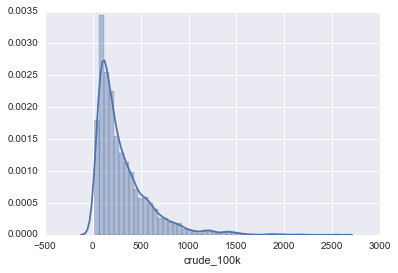

In [20]:
sns.distplot(deaths_pop['crude_100k']) #because this is a rate that was summed in the groupby previously, this needs to be recomputed

In [21]:
deaths_pop['death_rate_100k'] = deaths_pop['deaths'] / (deaths_pop['population']/100000)
deaths_pop['death_rate_100k'].describe() #new target variable

count    3103.000000
mean       77.136584
std        53.281455
min        17.323217
25%        49.077350
50%        65.386828
75%        88.757335
max       731.570062
Name: death_rate_100k, dtype: float64

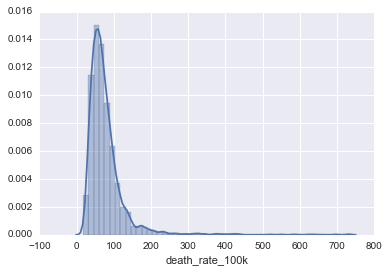

In [22]:
sns.distplot(deaths_pop['death_rate_100k'])

## Based on the prominence of "population" in the predictions (of a rate), going to remove the outliar populations with exceptionally low populations

y and X will be limited features

y_full and X_full will be full datatset

In [23]:
print(deaths_pop['death_rate_100k'][deaths_pop['population']<10000].mean(),
deaths_pop['death_rate_100k'][deaths_pop['population']<5000].mean(),
deaths_pop['death_rate_100k'][deaths_pop['population']<3000].mean()) 

# at 3k, dropping 14 samples
# at 5k 47 samples
# at 10k, 214 samples


#outliars are definitely in this range -- starting with 

(200.3427894419803, 359.96216731304736, 463.21332975628826)


In [24]:
print(len(deaths_pop[deaths_pop['population']<10000]), len(deaths_pop))

(213, 3103)


In [25]:
state_feats

Index([u'AK', u'AL', u'AR', u'AZ', u'CA', u'CO', u'CT', u'DC', u'DE', u'FL',
       u'GA', u'HI', u'IA', u'ID', u'IL', u'IN', u'KS', u'KY', u'LA', u'MA',
       u'MD', u'ME', u'MI', u'MN', u'MO', u'MS', u'MT', u'NC', u'NE', u'NH',
       u'NJ', u'NM', u'NV', u'NY', u'OH', u'OK', u'OR', u'PA', u'RI', u'SC',
       u'SD', u'TN', u'TX', u'UT', u'VA', u'WA', u'WI', u'WV', u'WY'],
      dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler
#saving this so can re-run the analysis later with full features
deaths_pop_lim = deaths_pop[deaths_pop['population']>10000] # playing with this line to see how it effects model
deaths_pop_lim = deaths_pop_lim[deaths_pop_lim['population']<4000000]

deaths_pop.head()

,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,SD,TN,TX,UT,VA,WA,WI,WV,WY,death_rate_100k
0,2003,1073,2146.0,26.0,54422.0,0.054,26.0,54422.0,95.427762,2146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.774797
1,2003,2020,4040.0,24.0,34160.0,0.049,24.0,34160.0,139.969440,4040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.257611
2,2003,4013,72234.0,591.0,1783462.0,1.212,591.0,1783462.0,715.153184,72234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.137796
3,2003,4019,36171.0,149.0,285630.0,0.308,149.0,285630.0,513.516478,36171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.165389
4,2003,4025,4025.0,10.0,11831.0,0.020,10.0,11831.0,84.523709,4025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.523709


In [27]:
def floater(df):
    for col in df:
        try:
            col = col.apply(lambda x: float(x))
        except:
            continue
    return df
                            
deaths_pop = floater(deaths_pop)
deaths_pop.head()
                
# features = deaths_pop.iloc[:,['year','pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','pop_hisp_prop','population','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'T', 'VA', 'WA', 'WI', 'WV', 'WY']]
# #no male features  
# features.isnull().sum()


,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,SD,TN,TX,UT,VA,WA,WI,WV,WY,death_rate_100k
0,2003,1073,2146.0,26.0,54422.0,0.054,26.0,54422.0,95.427762,2146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.774797
1,2003,2020,4040.0,24.0,34160.0,0.049,24.0,34160.0,139.969440,4040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.257611
2,2003,4013,72234.0,591.0,1783462.0,1.212,591.0,1783462.0,715.153184,72234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.137796
3,2003,4019,36171.0,149.0,285630.0,0.308,149.0,285630.0,513.516478,36171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.165389
4,2003,4025,4025.0,10.0,11831.0,0.020,10.0,11831.0,84.523709,4025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.523709


In [28]:
#should also make dummies for year - not sure why can't 

deaths_pop['year'].apply(lambda x: str(x))
year_dums = pd.get_dummies(deaths_pop['year'])
deaths_pop = pd.concat([deaths_pop,year_dums], axis = 1)
deaths_pop[2003]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
3078    0.0
3079    0.0
3080    0.0
3081    0.0
3082    0.0
3083    0.0
3084    0.0
3085    0.0
3086    0.0
3087    0.0
3088    0.0
3089    0.0
3090    0.0
3091    0.0
3092    0.0
3093    0.0
3094    0.0
3095    0.0
3096    0.0
3097    0.0
3098    0.0
3099    0.0
3100    0.0
3101    0.0
3102    0.0
3103    0.0
3104    0.0
3105    0.0
3106    0.0
3107    0.0
Name: 2003, dtype: float64

In [29]:
deaths_pop.describe()

,year,county_code,County Code,Deaths,Population,pct_total_deaths,deaths,population_x,crude_100k,county_id,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,3103.000000,3103.000000,3.103000e+03,3103.000000,3.103000e+03,3103.000000,3103.000000,3.103000e+03,3103.000000,3.103000e+03,...,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,2008.953916,27196.322269,1.179666e+05,95.648405,1.899550e+05,0.164367,95.648405,1.899550e+05,309.133249,1.179666e+05,...,0.069932,0.077989,0.081534,0.079923,0.079278,0.089591,0.091524,0.094102,0.094102,0.105704
std,3.439746,15617.166602,1.383307e+05,157.232371,4.280490e+05,0.276684,157.232371,4.280490e+05,282.642096,1.383307e+05,...,0.255074,0.268198,0.273698,0.271217,0.270216,0.285641,0.288400,0.292018,0.292018,0.307508
min,2003.000000,1003.000000,1.003000e+03,10.000000,1.562000e+03,0.014000,10.000000,1.562000e+03,17.323217,1.003000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,12083.000000,3.440200e+04,15.000000,2.188650e+04,0.029000,15.000000,2.188650e+04,112.227389,3.440200e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,26163.000000,6.803400e+04,43.000000,7.262300e+04,0.072000,43.000000,7.262300e+04,215.381154,6.803400e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,41005.000000,1.450170e+05,114.000000,1.969130e+05,0.192000,114.000000,1.969130e+05,412.728139,1.450170e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2014.000000,56021.000000,1.060422e+06,1812.000000,5.645514e+06,4.154000,1812.000000,5.645514e+06,2566.462631,1.060422e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
median_drug_rate = np.median(deaths_pop['death_rate_100k'])
y = deaths_pop['death_rate_100k']
# features = deaths_pop[['year','pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','pop_hisp_prop','population','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY']]
features = deaths_pop[['pop_sub_15_prop','pop_15-34_prop','pop_35-54_prop','pop_55+_prop','pop_asian_prop', 'pop_white_prop','pop_black_prop','pop_hisp_prop','population','med_hh_income', 'unemp_rate', 'perc_pop_working', 'pov_rate', 'pov_rate_youth', 'constant', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO','CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH','NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI','SC','SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]]

# '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'
features.to_csv('full_features_cdc_states_years.csv')


In [31]:
X = StandardScaler().fit_transform(features)
X = pd.DataFrame(X, columns=features.columns)

#PCA for later plots & model testing

pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
pca_4 = PCA(n_components=4)
xPC_2 = pca_2.fit_transform(X)
xPC_3 = pca_3.fit_transform(X)
xPC_4 = pca_4.fit_transform(X)

## Implementing Tree Models, partially for feature importance

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.cross_validation import StratifiedKFold, permutation_test_score
from sklearn.tree import DecisionTreeRegressor

stratk = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=66)


dt_simple = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=6, max_depth=6)
dt_simple.fit(X,y)
s_dt = cross_val_score(dt_simple, X, y, cv=stratk, n_jobs=-1)

print("Decision Tree", s_dt.mean())


/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


('Decision Tree', 0.81523000084618835)


 ## Can't currently get gridsearchcv to work
 
 moving on for now - i think its related to my kernel

In [33]:
# from sklearn.grid_search import GridSearchCV

# split_vals = [2,3,4,5,6,7,8,9]
# depths = [3,4,5,6,7,8,9,10]
# max_feats = [3,4,5,6,7,8,10,12,14,20]

# dt = DecisionTreeRegressor()


# gs_dt = GridSearchCV(dt, {'min_samples_split': split_vals, 'max_depth': depths, 'max_features': max_feats}, cv=15)
# gs_dt.fit(X, y)
# s_gb_tree_cv = cross_val_score(gs_dt, X, y, cv=stratk, n_jobs=-1, scoring='f1')

# print(s_gb_tree_cv.mean(),
# gs_dt.best_params_)



In [34]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
import seaborn as sns

rf = RandomForestRegressor()
rf_cv = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)
rf.fit(X_train, y_train)
ypred_rf = rf.predict(X_test)
s_rf_cv = cross_val_score(rf_cv, X, y, cv=stratk, n_jobs=-1)
    
s_rf_cv.mean()

#real progress with the random forest -- lets see how it compares to bagging  (~.90)

0.90878614265360935

In [35]:
#BAGGING NOT WORKING

# bc_cv = BaggingRegressor(n_estimators=100)

# #X_scale = X_train     X_dums = Xd_train
# # bc.fit(X_train,y_train)
# s_bc = cross_val_score(bc_cv, X, y, cv=stratk, n_jobs=-1, scoring='f1')
# s_bc.mean()

# print("{} Score:\t{:0.3} ± {:0.3}".format("Bagging Trees", s_bc.mean(), s_bc.std()))


In [36]:
# gs_rf = GridSearchCV(rf, {'min_samples_split': split_vals, 'max_depth': depths, 'max_features': max_feats}, cv=15)
# s_gs_rf_cv = cross_val_score(gs_rf, X, y, cv=stratk, n_jobs=-1)
# s_gs_rf_cv.mean()

## Looking at Feature Importance

In [37]:
rel_feature_import = sorted(zip(rf.feature_importances_, features.columns), reverse=True)
rel_feature_import = pd.DataFrame(rel_feature_import)
rel_feature_import #pop was .74 before outliar removal

,0,1
0,0.765733,population
1,0.078044,perc_pop_working
2,0.038189,med_hh_income
3,0.019598,pop_hisp_prop
4,0.011713,pop_black_prop
5,0.010478,pop_asian_prop
6,0.010375,unemp_rate
7,0.008883,pov_rate_youth
8,0.008807,pop_white_prop
9,0.006454,pov_rate


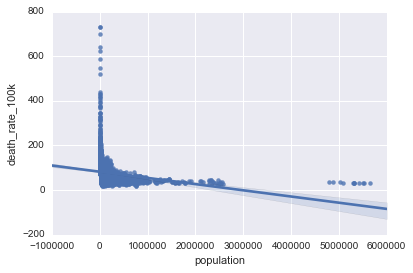

In [38]:
#because population at the top, let's graph how it relates to mortality rate

sns.regplot(x='population', y='death_rate_100k', data=deaths_pop) #some serious outliar action
#appears all the outliars are at very low populations

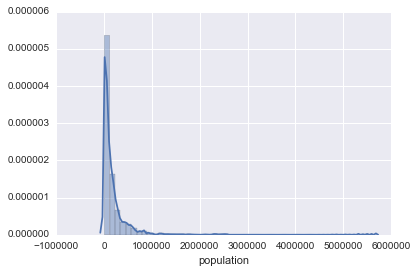

In [39]:
sns.distplot(deaths_pop['population'])

In [40]:
print(deaths_pop['death_rate_100k'][deaths_pop['population']<1000000].mean(), 
deaths_pop['death_rate_100k'][deaths_pop['population']>1000000].mean())



(78.09140320671388, 37.50505005220931)


Turns out, low population counties have dramatically higher mortality than larger population areas, (smaller than a million compared to bigger than a million)

In [41]:
print(deaths_pop['death_rate_100k'][deaths_pop['population']<100000].mean(), 
deaths_pop['death_rate_100k'][deaths_pop['population']<10000].mean()) #these are dramatic outliars, lets take them out
#re-running this model with limited dataset
#less than 100k pop has higher mean than less than a million, less than 10k has highest likelihood

(93.02664662500416, 200.3427894419803)


In [42]:
# deaths_pop['county_code'][deaths_pop['population']<1000000].value_counts()
# deaths_pop[deaths_pop['county_code']==26025] #2009 seems to have an error - looks like deaths and pop for 2008 & 2009 pooled
# deaths_pop[deaths_pop['county_code']==53015] #no issues
# deaths_pop[deaths_pop['county_code']==47093] #no issues
# deaths_pop[deaths_pop['county_code']==41005] #no issues

#lead by Calhoun County, Michigan (26025) but looks like issues with 2009

s_rf_cv.mean()

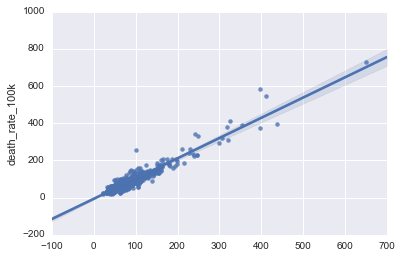

In [43]:
sns.regplot(ypred_rf, y_test)

## Implementing Kaggle-Darling XG Boost 

In [44]:
import xgboost

# fit model no training data
xg_model = xgboost.XGBRegressor()
xg_model_cv = xgboost.XGBRegressor()
xg_model.fit(X_train, y_train)

s_xg_cv = cross_val_score(xg_model_cv, X, y, cv=stratk, n_jobs=-1)

# make predictions for test data
y_pred_xg = xg_model.predict(X_test)
s_xg_cv.mean()

0.89302975206669311

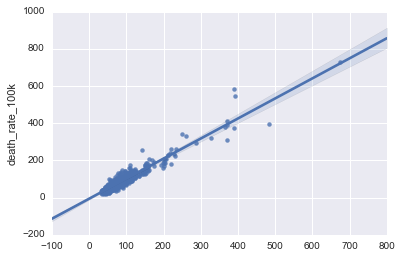

In [45]:
sns.regplot(y_pred_xg, y_test)

### Implementing GradientBoosting Regressor to see if this is diff from XG Boost

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gb_tree = GradientBoostingRegressor(n_estimators=1000)
gb_tree_cv = GradientBoostingRegressor(n_estimators=1000, max_depth=10, max_features=10)

gb_tree.fit(X_train, y_train)
ypred_gbtree = gb_tree.predict(X_test)

s_gb_tree_cv = cross_val_score(gb_tree_cv, X, y, cv=stratk, n_jobs=-1)
s_gb_tree_cv.mean()



0.88207559773562738

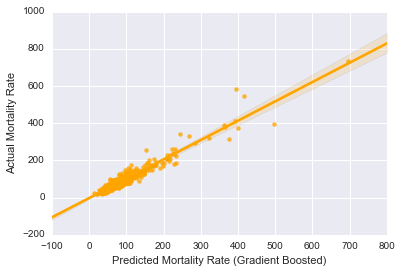

In [47]:
sns.regplot(ypred_gbtree, y_test, color="orange")
plt.xlabel('Predicted Mortality Rate (Gradient Boosted)')
plt.ylabel('Actual Mortality Rate')
plt.show()

In [48]:
### Quick visualization t-SNE 
### Also want to do some classification with DB Scan

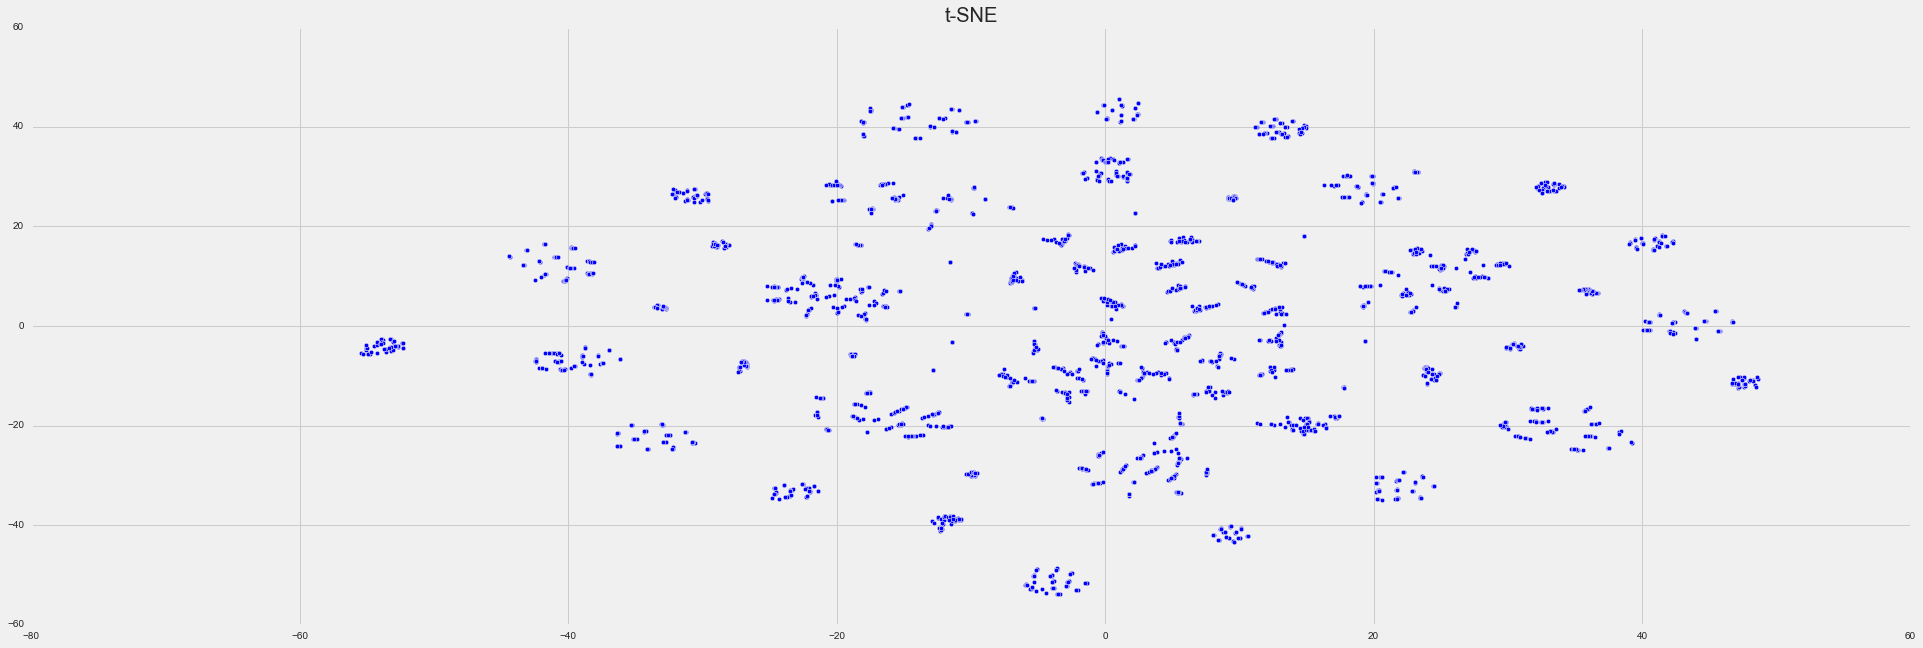

In [49]:
import datetime
from tsne import bh_sne
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
# t0 = datetime.time()
# X_tsne = tsne.fit_transform(features)


X_2d = bh_sne(X)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 10))
plt.scatter(X_2d[:,0],X_2d[:,1])
plt.title('t-SNE')
plt.xlabel('')
plt.ylabel('')


plt.show()

## Training a bunch more models to see if any improvements 

In [50]:
# ada_tree_scale = AdaBoostClassifier(n_estimators=100)
# gb_tree_scale = GradientBoostingClassifier(n_estimators=100)
# ada_rand_forest_scale = AdaBoostClassifier(RandomForestClassifier(class_weight='balanced', n_estimators=1000), n_estimators=100)
# # gb_rand_forest_scale = GradientBoostingClassifier(RandomForestClassifier(class_weight='balanced', n_estimators=1000), n_estimators=100)
# bc_rand_forest_scale = BaggingClassifier(RandomForestClassifier(class_weight='balanced', n_estimators=100), n_estimators=100) #.973  - .98 after
# bc_knn = BaggingClassifier(KNeighborsClassifier(), n_estimators=1000) #.973  - .98 after


## Exploring Outcomes

In [51]:
deaths_pop[['county_name', 'year']][deaths_pop['death_rate_100k']>200][deaths_pop['population']>10000]

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,county_name,year
9,"Humboldt County, CA",2003
1652,"Lake County, CA",2010
1705,"Monroe County, FL",2010
1741,"Pike County, KY",2010
2086,"Santa Fe County, NM",2011
2188,"Cabell County, WV",2011
2191,"Raleigh County, WV",2011
2299,"Campbell County, KY",2012
2482,"Raleigh County, WV",2012
2591,"Campbell County, KY",2013


## Summarizing info from the above

a rate of 200 means that in any given year, 0.2% of the population (or 1 in every 500 people) died in any given year from a drug-related cause. Such a rate occured only once prior to 2010 and 12 times since then. 

-- deep issues in the appalacia area


### Moving into clustering/ unsupervised methods & visualization

In [52]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score


db1 = DBSCAN(eps = 4, min_samples = 15).fit(X)  
db1labels = db1.labels_  
core_samples = db1.core_sample_indices_

print("Silhouette Coefficient: %0.3f" 
      % silhouette_score(X, db1labels), len(set(db1labels)), db1labels.mean())

('Silhouette Coefficient: -0.143', 31, 2.177247824685788)


In [53]:
db2 = DBSCAN(eps = 7, min_samples = 8).fit(X)  
db2labels = db2.labels_  
core_samples = db2.core_sample_indices_

# db2labels 
print("Silhouette Coefficient: %0.3f" 
      % silhouette_score(X, db1labels), len(set(db2labels)), db2labels.mean())

('Silhouette Coefficient: -0.143', 37, 9.3399935546245576)


In [54]:
# df_pca_2['cluster'] = pd.Series(clusters_pca.labels_)
plt.style.use('fivethirtyeight')
xPC_2 = pd.DataFrame(xPC_2, columns=['pc1', 'pc2'])
xPC_2.head()

,pc1,pc2
0,-1.032321,1.547519
1,-3.035499,-1.909669
2,-2.198038,-2.746797
3,-0.358709,-1.210396
4,1.146518,0.967598


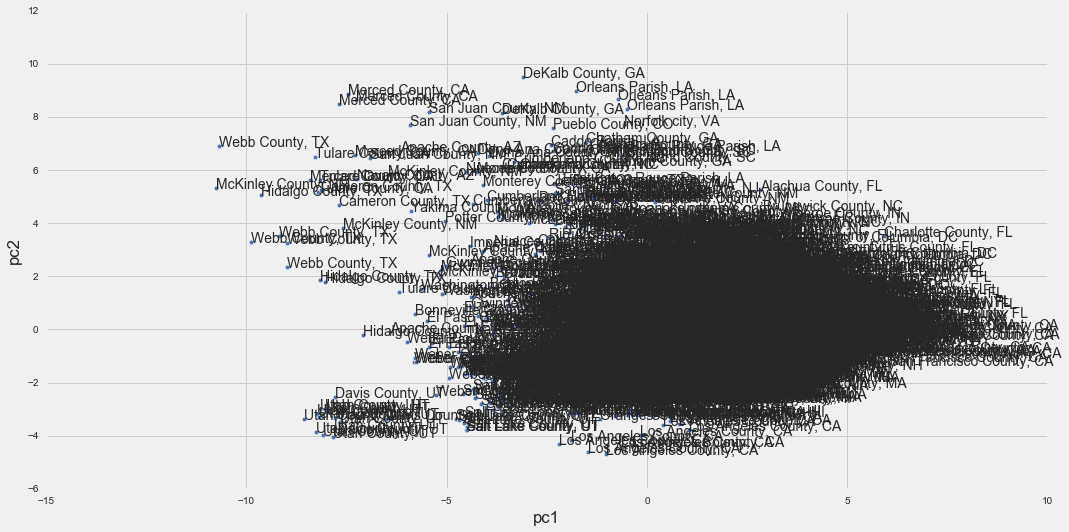

In [55]:
graph = xPC_2.plot(kind='scatter', x='pc1', y='pc2', figsize=(16,8))

for i, county in enumerate(deaths_pop['county_name']):
    graph.annotate(county, (xPC_2.iloc[i,0], xPC_2.iloc[i,1]))

### Implementing Classification Model

In [57]:
median_drug_rate

65.386828477271536

In [59]:
y_bin = y.apply(lambda x: 1 if x > median_drug_rate else 0)

In [60]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

rf_c_cv = RandomForestClassifier()


s_rf_cv = cross_val_score(rf_c_cv, X, y_bin, cv=stratk, n_jobs=-1)
    
s_rf_cv.mean()

0.86680604824141183

In [62]:
xg_class_model_cv = xgboost.XGBClassifier()

s_xg_cv = cross_val_score(xg_class_model_cv, X, y_bin, cv=stratk, n_jobs=-1)

s_xg_cv.mean()

0.88150995687461431

## Next Steps

#### Need to go back to summary statistics extracted and make sure trends found here agree to those findings
#### Need to explore why population figures are so distorted
- go through from beginning and just follow that column
#### Look for further features to add:
- population density
- policy features
- 